# Maximizing Revenue for Taxi Cab Drivers through Payment Type Analysis


**Problem Statement**

In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness. Our goal is to use data-driven insights to maximise revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.

**Objective**

This project’s main goal is to run an A/B test to examine the relationship between the total fare and the method of payment. We use Python hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a big difference in the fares for those who pay with credit cards versus those who pay with cash.

**Research Question**

Is there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience?

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import warnings

warnings.filterwarnings('ignore')

# Loading the Dataset

In [6]:
taxi_data = pd.read_csv('yellow_taxi_jan.csv')

In [7]:
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,01/01/2020 12:33:03 AM,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,01/01/2020 12:43:04 AM,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,01/01/2020 12:53:52 AM,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,01/01/2020 01:00:14 AM,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,01/01/2020 12:04:16 AM,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [8]:
taxi_data.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
6405193,2.0,2009-01-01 00:46:10,01/01/2009 01:16:52 AM,2.0,9.36,1.0,N,132,39,2.0,28.5,0.0,0.5,0.00,0.0,0.3,29.30,0.0
6405194,2.0,2021-01-20 12:25:47,01/20/2021 12:34:29 PM,1.0,1.56,1.0,N,170,79,1.0,8.0,1.0,0.5,2.46,0.0,0.3,14.76,2.5
6405195,2.0,2021-01-01 00:01:21,01/01/2021 12:01:40 AM,2.0,0.02,1.0,N,263,263,3.0,-2.5,-0.5,-0.5,0.00,0.0,-0.3,-6.30,-2.5
6405196,2.0,2021-01-01 00:01:21,01/01/2021 12:01:40 AM,2.0,0.02,1.0,N,263,263,2.0,2.5,0.5,0.5,0.00,0.0,0.3,6.30,2.5
6405197,2.0,2021-01-01 00:10:00,01/01/2021 12:30:47 AM,1.0,9.74,1.0,N,68,243,2.0,28.5,0.5,0.5,0.00,0.0,0.3,32.30,2.5


# Exploratory Data Analysis

In [9]:
taxi_data.shape

(6405198, 18)

In [10]:
taxi_data.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

# Calculating duration from the pickup and dropoff datetime in minutes

In [11]:
# converting pickup and dropoff to datatime
taxi_data['tpep_pickup_datetime'] = pd.to_datetime(taxi_data['tpep_pickup_datetime'])
taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(taxi_data['tpep_dropoff_datetime'])

# Subtracting the pickup time from dropoff time to get duration
taxi_data['duration'] = taxi_data['tpep_dropoff_datetime']-taxi_data['tpep_pickup_datetime']

#Converting into mintues
taxi_data['duration'] = taxi_data['duration'].dt.total_seconds()/60

In [12]:
taxi_data.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
duration                        float64
dtype: object

There are so many columns in the dataset, but as per our problem statement, we only require some fields from the original data. Rest columns are nothing but the unwanted columns for this study. So we will simply remove those columns.

As the problem statement is revolving around the payment type, fare amount, and any other factor influencing the fare amount, we will filter the data to have only passenger count, trip distance, payment type, fare amount and duration of the trip.

In [13]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'duration'],
      dtype='object')

In [14]:
# removing unwanted columns
taxi_data.drop(['VendorID','tpep_pickup_datetime','tpep_dropoff_datetime','RatecodeID','store_and_fwd_flag','PULocationID','DOLocationID','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount','congestion_surcharge'], axis=1,inplace=True)

In [15]:
# filtered data with relevant columns essential for the analysis
taxi_data.head()

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1.0,1.2,1.0,6.0,4.800000
1,1.0,1.2,1.0,7.0,7.416667
2,1.0,0.6,1.0,6.0,6.183333
3,1.0,0.8,1.0,5.5,4.850000
4,1.0,0.0,2.0,3.5,2.300000


In [16]:
taxi_data.isnull().sum()

passenger_count    65441
trip_distance          0
payment_type       65441
fare_amount            0
duration               0
dtype: int64

percentage of missing data to the total record of the data

In [ ]:
print('Missing data :',round(65441/taxi_data.shape[0]*100,2),"%")

Missing data : 1.02 %


As the data has only 1% of data missing, we can simply drop the records with missing values.

In [ ]:
taxi_data.dropna(inplace=True)

Changing the passenger count and payment type data type to integer as they are present in float

In [21]:
taxi_data['passenger_count'] = taxi_data['passenger_count'].astype('int64')
taxi_data['payment_type'] = taxi_data['payment_type'].astype('int64')

Check for the duplicate rows

In [23]:
taxi_data[taxi_data.duplicated()]

,passenger_count,trip_distance,payment_type,fare_amount,duration
2056,1,0.00,2,7.0,0.000000
2437,1,0.00,1,52.0,0.200000
2442,2,1.70,1,9.5,13.066667
2461,1,0.40,1,4.0,3.083333
3336,1,1.20,1,6.0,5.350000
...,...,...,...,...,...
6405186,1,2.82,2,10.0,9.333333
6405192,1,0.00,2,0.0,1.166667
6405194,1,1.56,1,8.0,8.700000
6405195,2,0.02,3,-2.5,0.316667


Removing duplicate rows as they will not contribute in analysis

In [24]:
taxi_data.drop_duplicates(inplace=True)

After removing missing values and duplicate rows, now we have this much records left

In [25]:
taxi_data.shape

(3007954, 5)

Passenger Count Distribution

In [26]:
taxi_data['passenger_count'].value_counts(normalize=True)

passenger_count
1    0.581981
2    0.190347
3    0.066361
5    0.062939
6    0.039269
4    0.036050
0    0.023032
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

Payment type distribution

In [28]:
taxi_data['payment_type'].value_counts()

payment_type
1    2040184
2     925180
3      26231
4      16358
5          1
Name: count, dtype: int64

We will focus solely on payment types 'card' and 'cash', denoted by 1 and 2 in dataset. To ensure our analysis centers on these payment methods, we'll filter the data accordingly, excluding all other types.

Moreover,examining the distribution of passenger counts reveals that trips with more than 5 passenger are rare. Additionally, trips with 0 passengers are impossible, as we expect at least one passenger to pay the fare amount. Therefore, we will filter the passenger count to include only values ranging from 1 to 5.

In [29]:
#filtering for payment type 1 and 2
taxi_data = taxi_data[taxi_data['payment_type']<3]

#filtering for passenger count from 1 to 5
taxi_data = taxi_data[(taxi_data['passenger_count']>0)&(taxi_data['passenger_count']<6)]

replacing the payment type encoded value 1 and 2 to Card and Cash

In [30]:
taxi_data['payment_type'].replace([1,2],['Card','Cash'], inplace=True)

Descriptive statistics for data

In [31]:
taxi_data.describe()

,passenger_count,trip_distance,fare_amount,duration
count,2.780384e+06,2.780384e+06,2.780384e+06,2.780384e+06
mean,1.733404e+00,4.536704e+00,1.780549e+01,2.415297e+01
std,1.176671e+00,4.895810e+00,1.506912e+01,9.257787e+01
min,1.000000e+00,-2.218000e+01,-5.000000e+02,-2.770367e+03
25%,1.000000e+00,1.500000e+00,9.000000e+00,9.883333e+00
50%,1.000000e+00,2.730000e+00,1.300000e+01,1.573333e+01
75%,2.000000e+00,5.470000e+00,2.100000e+01,2.336667e+01
max,5.000000e+00,2.628800e+02,4.265000e+03,8.525117e+03


Upon reviewing the provided statistics, it's evident that the minimun values for trip distance, fare amount, and duration are negative, which is unrealistic and invalid for futher analysis. Consequently, we will eliminate these negative values from the dataset.

Futhermore, observing the maximum and 50th percentile values, it's possible that the data contains significant outliers, particularly high values. These outliers need to be addressed and removed to ensure the integrity of the analysis.

In [ ]:
#filtering the records for only positive values
taxi_data = taxi_data[taxi_data['fare_amount']>0]
taxi_data = taxi_data[taxi_data['trip_distance']>0]
taxi_data = taxi_data[taxi_data['duration']>0]

Check for the outliers

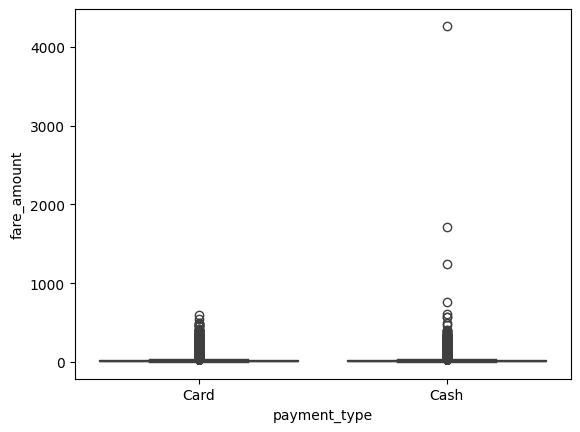

In [33]:
sns.boxplot(data=taxi_data,y='fare_amount',x='payment_type')
plt.show()

removing outliers using InterQuartile Range for the numerical variables

In [34]:
for col in ['trip_distance','fare_amount','duration']:
    Q1 = taxi_data[col].quantile(0.25)
    Q3 = taxi_data[col].quantile(0.75)
    IQR = Q3 -Q1

    #Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #filter out outliers
    taxi_data = taxi_data[(taxi_data[col] >= lower_bound) & (taxi_data[col] <= upper_bound)]

We're interseted on exploring the relationship between payment type and passenger behavior concerning trip distance and fare amount. Are there variations in the distribution of payment types concerning different fare amounts or trip distance?

To investigate this, we'll plot histograms to visualize the distribution of passenger counts paying with either card or cash. This will also provide stakeholders with insight into fare amount ranges associated with different payment methods.

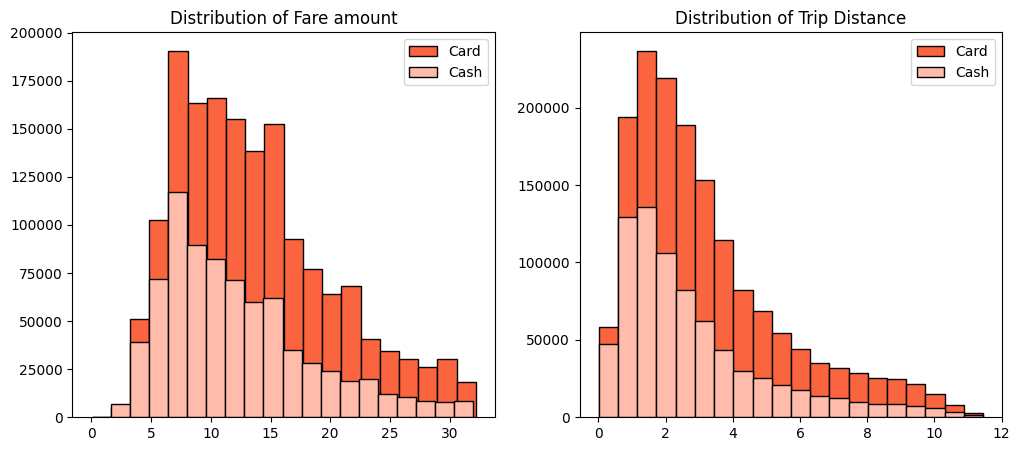

In [36]:
plt.figure(figsize=(12,5))

# 1st subplot: fare amount
plt.subplot(1,2,1)
plt.title("Distribution of Fare amount")
plt.hist(taxi_data[taxi_data['payment_type']=='Card']['fare_amount'], histtype='barstacked', bins = 20, edgecolor = 'k', color = '#FA643F', label = 'Card')
plt.hist(taxi_data[taxi_data['payment_type']=='Cash']['fare_amount'], histtype='barstacked', bins = 20, edgecolor = 'k', color = '#FFBCAB', label = 'Cash')
plt.legend()

# 2nd subplot: trip distance
plt.subplot(1,2,2)
plt.title("Distribution of Trip Distance")
plt.hist(taxi_data[taxi_data['payment_type']=='Card']['trip_distance'], histtype='barstacked', bins = 20, edgecolor = 'k', color = '#FA643F', label = 'Card')
plt.hist(taxi_data[taxi_data['payment_type']=='Cash']['trip_distance'], histtype='barstacked', bins = 20, edgecolor = 'k', color = '#FFBCAB', label = 'Cash')
plt.legend()

plt.show()


In [37]:
taxi_data.groupby('payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card            13.70201  6.506360      3.230765  2.320528
Cash            12.25038  6.246215      2.803790  2.231926

Now, in order to examine the passenger's preference regrading their choice of payment method, we will assess the proportion of the two payment types.To provide a visual representation, we have opted to utilize a pie chart. This graphical depiction will offer a clear and intuitive understanding of the distribution between the two payment methods chosen by passengers.

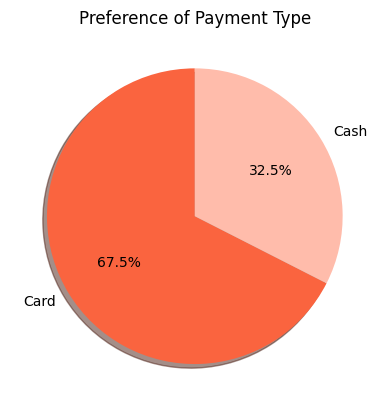

In [38]:
plt.title('Preference of Payment Type')
plt.pie(taxi_data['payment_type'].value_counts(normalize= True), labels=taxi_data['payment_type'].value_counts().index,startangle=90,shadow=True,autopct='%1.1f%%', colors=['#FA643F','#FFBCAB'])
plt.show()

Subsequently, we aim to conduct an analysis of the payment types in relation to the passengers count. Our objective is to investigate if there are any changes in preference contingent upon the number of passengers traveling in the cab.

To facilitate this examination, we have employed a visualization technique known as a stacked bar plot. This method is particularly advantageous  for comparing the percentage distribution of each passenger count based on the payment methor selected. Through this graphical representation, we can gain insights into potential variations in payment preference across different passenger counts.

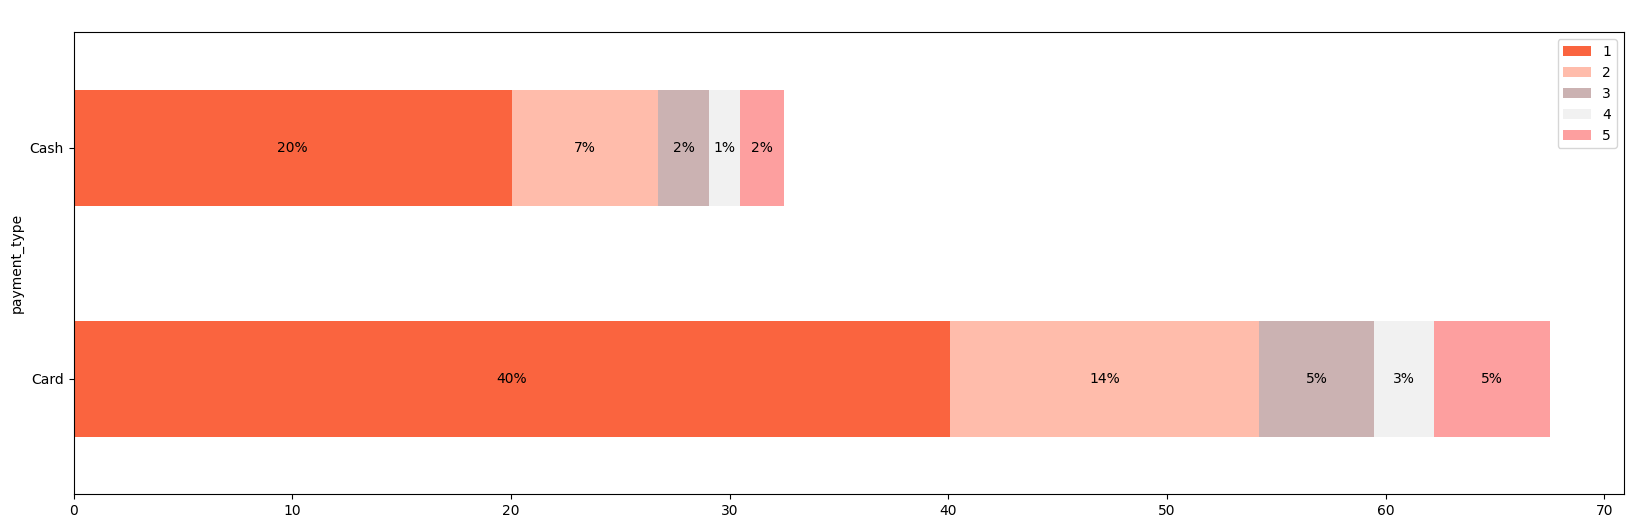

In [39]:
#calculating the total passenger count distribution based on the different payment type
passenger_count = taxi_data.groupby(['payment_type','passenger_count'])[['passenger_count']].count()

#renaming th passenger_count to count to reset the index
passenger_count.rename(columns = {'passenger_count':'count'}, inplace = True)
passenger_count.reset_index(inplace=True)

#calculating the percentage of the each passenger count
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100

#creating a new empty dataframe to store the distribution of each payment type(useful for the visualization)
df = pd.DataFrame(columns=['payment_type',1,2,3,4,5])
df['payment_type'] = ['Card','Cash']
df.iloc[0,1:] = passenger_count.iloc[:5,-1]
df.iloc[1,1:] = passenger_count.iloc[5:,-1]

fig, ax = plt.subplots(figsize=(20,6))
df.plot(x='payment_type', kind='barh', stacked=True, title= ' ', ax=ax, color=['#FA643F','#FFBCAB','#CBB2B2','#F1F1F1','#FD9F9F'])

#Add percentage text
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2, y + height/2, '{:.0f}%'.format(width), horizontalalignment='center', verticalalignment='center')


# Hypothesis Testing

In order to select the most suitable test for our scenario, our initial step involves evaluating whether the distribution of fare amounts adheres to a normal distribution. While the histogram depicted above suggests otherwise, we will further confirm this by generating a QQ plot.

Quantile-quantile (QQ) plots can be used to assess whether the fare amount distributions for each payment type are approximately normally distributed. If the data points closely align with the diagonal line in the plot, it suggests that the data follows a normal distribution.

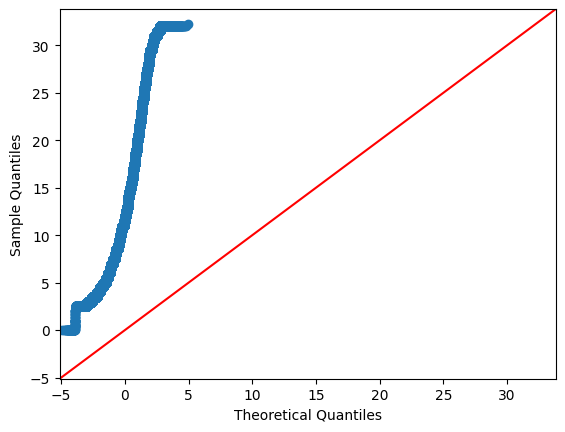

In [40]:
# create QQ plot with 45-degree line added to plot
fig = sm.qqplot(taxi_data['fare_amount'], line = '45')
plt.show()

The data values clearly do not follow the red 45-degree line, which is an indication that they do not follow a normal distribution. So, Z distribution will not be good for this.That's why we use T-test.


Given that the T-test can be applied to both small and large samples and does not require the population standard deviation,  it is a universally applicable approach for hypothesis testing in many pratical research scenarios, including analyses of taxi trip data.

In the analyses of NYC Yellow Taxi trip data, where you’re likely dealing with an unknown population standard deviation and potentially large datasets, the T-test offers a more appropriate and flexible method for comparing means between two groups (e.g., fare amounts by payment type). It provides a reliable way to infer about the population, accommodating the uncertainty that comes with estimating population parameters from sample data.

**Null hypothesis:** There is no difference in average fare between customers who use credit cards and customers who use cash.

**Alternative hypothesis:** There is a difference in average fare between customers who use credit cards and customers who use cash.

In [41]:
#sample 1
credit_card = taxi_data[taxi_data['payment_type']=='Card']['fare_amount']

#sample 2
cash = taxi_data[taxi_data['payment_type']=='Cash']['fare_amount']

#performing t test on both the different sample
t_stats, p_value = st.ttest_ind(a=credit_card, b=cash,equal_var=False)
print(f'T-statistic: {t_stats}, p-value: {p_value}')

#comparing the p value with the significance of 5% or 0.05
if p_value < 0.05:
    print('\nReject the null hypothesis')
else:
    print('\nAccept the null hypothesis')

T-statistic: 165.5935203212796, p-value: 0.0

Reject the null hypothesis


Since the p-value is significantly smaller than the significance level of 5%, we will reject the null hypothesis.
You conclude that there is a statistically significant difference in the average fare amount between customers who use credit cards and customers who use cash.
The key business insight is that encouraging customers to pay with credit cards can generate more revenue for taxi cab drivers.
